In [2]:
from qiskit import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [3]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmqx2')

In [4]:
#initialize 
U = 4
V = 0.745356
theta_c = -2.50107
theta_b = [1.5708, -2.16167, 0]


**From the paper**, the optimal values of $\theta$ for the $\vert00\rangle$ in Fig.2b are:
$$\theta_0=1.5708 \\
\theta_1=-2.16167 \\
\theta_2=0$$
Want to calculate $\langle H \rangle = \frac{U}{4}\langle \sigma^0_z \sigma^1_z \rangle + V(\langle \sigma^0_x \rangle + \langle\sigma^1_x\rangle)$.


In [5]:
q_b = QuantumRegister(2)
c_b = ClassicalRegister(2)
circuit_b = QuantumCircuit(q_b, c_b)

#initialise and measure in Pauli z basis
circuit_b.u3(theta_b[0],0,0,q_b[0])
circuit_b.u3(theta_b[1],0,0,q_b[1])
circuit_b.cx(q_b[0],q_b[1])

"""
REMOVE THIS PART FOR OPTIMISED MMT

circuit_b.barrier()
circuit_b.id(q_b)
"""
circuit_b.measure(q_b, c_b)
circuit_b.draw(output='mpl')
job_bz1= execute(circuit_b, backend=backend, initial_layout=[0,1], shots=8192)

In [6]:
#initialise and measure in Pauli X basis
q_b = QuantumRegister(2)
c_b = ClassicalRegister(2)
circuit_b = QuantumCircuit(q_b, c_b)

circuit_b.u3(theta_b[0],0,0,q_b[0])
circuit_b.u3(theta_b[1],0,0,q_b[1])
circuit_b.cx(q_b[0],q_b[1])

"""
REMOVE THIS PART FOR OPTIMISED MMT

circuit_b.barrier()
"""
circuit_b.h(q_b)
circuit_b.measure(q_b, c_b)
circuit_b.draw(output='mpl')
job_bx1= execute(circuit_b, backend=backend, initial_layout=[0,1], shots=8192)

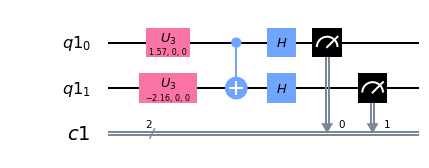

In [7]:
circuit_b.draw(output='mpl')

In [ ]:
"""
#initialise and measure in Pauli Y basis
q_b = QuantumRegister(2)
c_b = ClassicalRegister(2)
circuit_b = QuantumCircuit(q_b, c_b)

circuit_b.u3(theta_b[0],0,0,q_b[0])
circuit_b.u3(theta_b[1],0,0,q_b[1])
circuit_b.cx(q_b[0],q_b[1])


#REMOVE THIS PART FOR OPTIMISED MMT

#circuit_b.barrier()

circuit_b.sdg(q_b)
circuit_b.h(q_b)
circuit_b.measure(q_b, c_b)
circuit_b.draw(output='mpl')
job_by1= execute(circuit_b, backend=backend, initial_layout=[0,1], shots=8192)
"""

In [ ]:
print(job_cz.job_id())
print(job_cz.result().get_counts())

print(job_cz.qobj())
job_cz.time_per_step()

The optimal value of $\theta$ for Fig.2c is $\theta_0=-2.50107$, giving $E_0 = -1.24722$.

We want to calculate $\langle H \rangle = \frac{U}{4}\langle\sigma_z\rangle + V\langle\sigma_x\rangle$

In [13]:
#Pauli Z basis
q_c = QuantumRegister(1)
c_c = ClassicalRegister(1)
circuit_c = QuantumCircuit(q_c,c_c)
circuit_c.u3(theta_c,0,0,q_c)

"""
Remove this for optimised run

circuit_c.barrier()
circuit_c.id(q_c)
"""
circuit_c.measure(q_c,c_c)
circuit_c.draw(output='mpl')
job_cz1 = execute(circuit_c, backend=backend, initial_layout=[0], shots=8192)

In [14]:
#initialise and measure in Pauli X basis
q_c = QuantumRegister(1)
c_c = ClassicalRegister(1)
circuit_c = QuantumCircuit(q_c,c_c)
circuit_c.u3(theta_c,0,0,q_c)


circuit_c.h(q_c)
circuit_c.measure(q_c,c_c)
circuit_c.draw(output='mpl')
job_cx1 = execute(circuit_c, backend=backend, initial_layout=[0], shots=8192)

In [ ]:
"""
#initialise and measure in Pauli Y basis
q_c = QuantumRegister(1)
c_c = ClassicalRegister(1)
circuit_c = QuantumCircuit(q_c,c_c)
circuit_c.u3(theta_c,0,0,q_c)

#Remove this one for optimised mmt

#circuit_c.barrier()

circuit_c.sdg(q_c)
circuit_c.h(q_c)
circuit_c.measure(q_c, c_c)
circuit_c.draw(output='mpl')
job_cy1 = execute(circuit_c, backend=backend, initial_layout=[0], shots=8192)
"""

In [20]:
meas_calibs, state_labels = complete_meas_cal(qubit_list=[0,1], qr=5, circlabel='mcal')
job = qiskit.execute(meas_calibs, backend=backend, shots=8192)
cal_results = job.result()
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
#Calibration matrix for result C

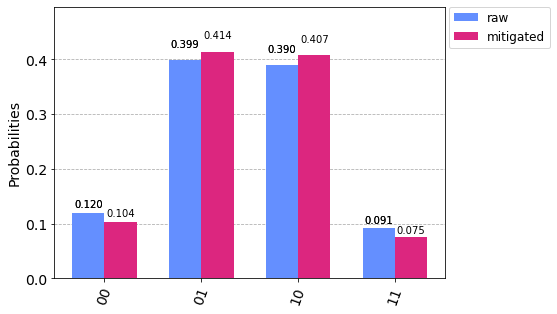

In [23]:
raw_counts = job_bz1.result().get_counts()

# Get the filter object
meas_filter = meas_fitter.filter

# Results with mitigation
mitigated_results = meas_filter.apply(job_bz1.result())
mitigated_counts = mitigated_results.get_counts(0)
from qiskit.tools.visualization import *
plot_histogram([raw_counts, mitigated_counts], legend=['raw', 'mitigated'])

In [24]:
mitigated_counts

{'10': 3335.7857355731694,
 '01': 3390.076507219211,
 '00': 849.2122044946017,
 '11': 616.9255527130179}

In [ ]:
job = list(range(3000))
for shots in range(3000):
    job[shots] = execute(circuit_c, backend=backend, initial_layout=[0], shots=shots)
job = job[:list(map(lambda x: type(x) == int, job)).index(1)]
job = [i for i in job if i.status().name == 'DONE']

In [ ]:
times = [i.time_per_step()['COMPLETED'] - i.time_per_step()['RUNNING'] for i in job]

In [ ]:
plt.scatter([i.qobj().config.shots for i in job], list(map( lambda x: x.total_seconds(),times)))
plt.xlabel('shots')
plt.ylabel('s')
plt.show()